In [35]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style="darkgrid")
from time import time

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA    

# Pretty display for notebooks
%matplotlib inline

In [39]:
#without accuracy ---> 2
#SVM 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%pylab inline
from random import *
from subprocess import check_output
def Propublica_svm(X,Y):
    #Split data into training and test datasets (training will be based on 70% of data)
    from sklearn.model_selection import train_test_split
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0,shuffle=True) 
    #test_size: if integer, number of examples into test dataset; if between 0.0 and 1.0, means proportion
    print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

    
    #Scaling data
    #from sklearn.preprocessing import StandardScaler
    
    from sklearn.model_selection import cross_val_score

    #sc = StandardScaler(with_mean=False)
    
    
    #sc.fit(X_train)
    #X_train_std = sc.transform(X_train)
    #X_test_std = sc.transform(X_test)

    #X_train_std and X_test_std are the scaled datasets to be used in algorithms

    #Applying SVC (Support Vector Classification)
    from sklearn.svm import SVC
    svm = SVC(kernel='rbf', random_state=1, gamma=.1, C=10.0,probability=True)
    svm.fit(X_train, Y_train)
    print('The accuracy of the SVM classifier on training data is {:.2f}'.format(svm.score(X_train, Y_train)))
    print('The accuracy of the SVM classifier on test data is {:.2f}'.format(svm.score(X_test, Y_test)))
    print('####Train prediction Label###############################################')
    Y_train_pred=svm.predict(X_train)
    #print(y_1)
    Y_test_pred=svm.predict(X_test)

    print('####Actual Train Label###############################################')


    print('####Change to colors###############################################')
    e=svm.predict_proba(X_test)
    print(e)
    print(Y_test_pred)
    
    return X_test,Y_test_pred,Y_test,e
     



Populating the interactive namespace from numpy and matplotlib


/home/subham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['seed', 'shuffle', 'time', 'uniform', 'random', 'choice', 'randint', 'e', 'triangular', 'sample']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [41]:
#without accuracy ---> 2
def main(datax, y_test, y_test_pred,e): 
        
    n=datax.shape[1]
    s=datax.shape[0]    
    data = datax
    
    r = np.zeros(n, dtype = int) 
    
    for i in range(n):
        if int(y_test.iloc[i])==1 :
            r[i]=1
        else :
            r[i]= -1  
    
    r2 = np.zeros(n, dtype = int) 
    for i in range(n):
        if int(y_test_pred[i])==1 :
            r2[i]=1
        else :
            r2[i]= -1          
    ar=[]
    
    for j in range(s):
        print("sensitive attribute ",(j+1)) 
        a=0
        b=0
        acc1=0
        acc2=0
        for i in range(n):
                if data[j][i]== 1 :
                    a=a+1
                    if r[i]==1:
                         acc1=acc1+1 

        print("ACTUAL----------total ,accepted, aceeptance rate:")             
        a1=float(acc1/a)
        print(a)
        
        print(acc1)
        print(a1)
        ar.append(a1)
        
    maxi= max(ar)
    mini= min(ar)
    DP=float(maxi-mini)
    print("data acceptance rates")
    print(ar)
    print("data DP")
    print(DP)
    
    ar=[]
    
    for j in range(s):
        print("sensitive attribute ",(j+1)) 
        a=0
        b=0
        acc1=0
        acc2=0
        prec=0
        reca=0
        accur=0
        FP=0
        FN=0
        TP=0
        TN=0
        for i in range(n):
             if data[j][i]== 1 :
                    a=a+1
                    if r2[i]==1:
                        acc1=acc1+1 
                        if r[i]==1:
                            TP=TP+1
                        else:
                             FP=FP+1                
                    else:
                        if r[i]==1:
                            FN=FN+1
                        else:
                            TN=TN+1    
        
        print("prec reca accuracy for each sens") 
        prec= float(TP/(TP+FP))
        reca= float(TP/(TP+FN))
        accur= float((TP+TN)/a)
        print(prec,reca,accur)
        
        print("SVM----------total , accepted, aceeptance rate:")             
        
        a1=float(acc1/a)
        print(a)
        
        print(acc1)
        print(a1)
        ar.append(a1)
        
    maxi= max(ar)
    mini= min(ar)
    DP=float(maxi-mini)
    print("data acceptance rates")
    print(ar)
    print("data DP")
    print(DP) 
    
    print("SVM accuracy--------------------------")
    prec=0
    reca=0
    accur=0
    FP=0
    FN=0
    TP=0
    TN=0
    for i in range(n):
            if r2[i]==1:
                acc1=acc1+1 
                if r[i]==1:
                    TP=TP+1
                else:
                     FP=FP+1                
            else:
                if r[i]==1:
                     FN=FN+1
                else:
                     TN=TN+1    

        
    prec= float(TP/(TP+FP))
    reca= float(TP/(TP+FN))
    accur= float((TP+TN)/n)
    print(prec,reca,accur)
    
    

   
   
    gamma=[[0.4451345755693582, 0.41134751773049644, 0.462033462033462, 0.46994535519125685, 0.4375, 0.4635416666666667, 0.45555555555555555, 0.4444444444444444],
           [0.4451345755693582, 0.41134751773049644, 0.47619047619047616, 0.46994535519125685, 0.4375, 0.475, 0.4642857142857143, 0.4444444444444444],
           [0.4306418219461698, 0.41134751773049644, 0.4774774774774775, 0.46994535519125685, 0.42628205128205127, 0.47604166666666664, 0.4595238095238095, 0.4444444444444444],
           [0.4451345755693582, 0.41134751773049644, 0.47619047619047616, 0.4918032786885246, 0.4375, 0.4791666666666667, 0.4642857142857143, 0.4567901234567901]]
    alpha=[[1,1,1,1]]
    #alpha=[[1,1,1,1],[1,1,2,1],[1,1,4,1],[1,1,6,1],[1,1,8,1],[1,1,10,1],[1,1,15,1],[1,1,.20,1],[1,1,25,1],[1,1,30,1],[1,1,.1,1]]
    epsilon=[.01]
    fi= np.zeros(n,dtype=int) 
    new=0
    
    
    #for t in range(gamma.shape[0]):
    for new in range(4):   
        for t in range(1):
            for eps in epsilon:
                u1,u2=min_sum_lpca_g(data,gamma[new],eps,e,alpha[t])
                #######################Disp_impact#######################  
                print("gamma-epsilon-delta",gamma[new],eps)
                accu_all=[]
                DP_all=[]
                precision_all=[]
                recall_all=[]
                ar_all=[]
                acceptance_rate = np.zeros( (7,28), dtype=float)
                count=0
                print("<--------------------------------------->")
                print("iteration t",t)
        #                 for alpha in np.arange(0,1.05,0.05):
        #                     print("alpha: ",alpha)
        #                     for i in range(n):

        #                         z=random()
        #                         if z < alpha:
        #                                fi[i]= u1[i] 

        #                         else:
        #                                fi[i]= r2[i]

                for i in range(n):
                     fi[i] = u1[i]


                for j in range(s):
                    print("sensitive attribute ",(j+1)) 

                    TP=0
                    FP=0
                    FN=0
                    TN=0
                    precision=0
                    recall=0
                    for i in range(n):
                         if data[j][i]== 1 :                        
                            if fi[i]==1 and r[i]==1:
                                TP=TP+1
                            if fi[i]==1 and r[i]==-1:
                                FP=FP+1 
                            if fi[i]==-1 and r[i]==1:
                                FN=FN+1
                            if fi[i]==-1 and r[i]==-1:
                                TN=TN+1    
                    if TP+FP !=0:
                        precision=float(TP/(TP+FP))
                    #print("precision",precision)
                    if TP+FN !=0:    
                        recall=float(TP/(TP+FN))
                    #print("recall",recall)

                    precision_all.append(precision)
                    recall_all.append(recall)
                    #print("TP,FP,TN,FN")
                    #print(TP,FP,TN,FN)

                    a=0
                    b=0
                    acc1=0
                    acc2=0
                    for i in range(n):
                            if data[j][i]== 1 :
                                a=a+1
                                if fi[i]==1:
                                     acc1=acc1+1 

        #                         print("total ,fair accepted, aceeptance rate:")             
                    a1=float(acc1/a)



        #                         print(a)
        #                         print(acc1)
        #                         print(a1)
                    ar_all.append(a1)

                count = count+1
                maxi=max(ar_all)
                mini= min(ar_all)
                DP=float(maxi-mini)
                print("individual acceptance rates")
                print(ar_all)
                print("individul precision")
                print(precision_all)
                print("individual recall")
                print(recall_all)
                print("DP all")
                print(DP)
                f_acc=0
                for i in range(n):
                     if fi[i] == r[i]:
                            f_acc=f_acc+1
                f_acc_l=float((f_acc*100)/n) 

        #######################################################################33   

        #                         print("sensitive attribute ",(j+1)) 





                TP=0
                FP=0
                FN=0
                TN=0
                precision=0
                recall=0
                accu=0
                for i in range(n):
                        if fi[i]==1 and r[i]==1:
                            TP=TP+1
                        if fi[i]==1 and r[i]==-1:
                            FP=FP+1 
                        if fi[i]==-1 and r[i]==1:
                            FN=FN+1
                        if fi[i]==-1 and r[i]==-1:
                            TN=TN+1    

                if TP+FP!=0:
                    precision=float(TP/(TP+FP))
                print("precision all",precision)
                if TP+FN!=0:
                    recall=float(TP/(TP+FN))


                print("recall all",recall)
                accu=float((TP+TN)/(TP+FN+TN+FP))


                print("accuracy all",accu)



                print("TP,FP,TN,FN")
                print(TP,FP,TN,FN)
        #                         print("total ,fair accepted, aceeptance rate:")             
                a1=float(acc1/a)

    alpha_weight=np.arange(0,1.05,.05)        
    return accu_all,DP_all,acceptance_rate,alpha_weight

In [50]:

#NG
import time
import pulp as p 
def min_sum_lpca_g(data1,beta,eps,e,alpha):
    import pulp as p 
    import math
    m=data1.shape[0]
    n=data1.shape[1]
    print('dimension of data')
    print(m,n)
    
    ################ sorted result
       
  
    h1=[]
    h2=[]
    h3=[]
    h4=[]
    h5=[]
    h6=[]
    h7=[]
    key1=[]
    key2=[]
    key3=[]
    key4=[]
    key5=[]
    key6=[]
    key7=[]
    h8=[]
    h9=[]
    h10=[]
    h11=[]
    h12=[]
    h13=[]
    h14=[]
    key8=[]
    key9=[]
    key10=[]
    key11=[]
    key12=[]
    key13=[]
    key14=[]
    cost=np.zeros(n,dtype=int)
    data2=np.zeros((m,n),dtype=int)
    for i in range(n):
        if data1[0][i]==1:            

            h1.append(e[i][1])
            key1.append(i)
            

        if data1[1][i]==1:
            h2.append(e[i][1])
            key2.append(i)
            
            
        if data1[2][i]==1:
            h3.append(e[i][1])
            key3.append(i)
            
        if data1[3][i]==1:
            h4.append(e[i][1])
            key4.append(i)
        if data1[4][i]==1:
            h5.append(e[i][1])
            key5.append(i)
        if data1[5][i]==1:
            h6.append(e[i][1])
            key6.append(i)
        if data1[6][i]==1:
            h7.append(e[i][1])
            key7.append(i)
        if data1[7][i]==1:            
            h8.append(e[i][1])
            key8.append(i)
#print(hc)
#     print(key1)
    
    for i in range(1,len(h1)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h1[j-1]<h1[j]:
                index=j
                var=h1[j]
                h1[j]=h1[j-1]
                h1[j-1]=var

                var2=key1[j]
                key1[j]=key1[j-1]
                key1[j-1]=var2
            else:
                break
    

    for i in range(1,len(h2)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h2[j-1]<h2[j]:
                index=j
                var=h2[j]
                h2[j]=h2[j-1]
                h2[j-1]=var

                var2=key2[j]
                key2[j]=key2[j-1]
                key2[j-1]=var2
            else:
                break
    for i in range(1,len(h3)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h3[j-1]<h3[j]:
                index=j
                var=h3[j]
                h3[j]=h3[j-1]
                h3[j-1]=var

                var2=key3[j]
                key3[j]=key3[j-1]
                key3[j-1]=var2
            else:
                break
    for i in range(1,len(h4)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h4[j-1]<h4[j]:
                index=j
                var=h4[j]
                h4[j]=h4[j-1]
                h4[j-1]=var

                var2=key4[j]
                key4[j]=key4[j-1]
                key4[j-1]=var2
            else:
                break
    for i in range(1,len(h5)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h5[j-1]<h5[j]:
                index=j
                var=h5[j]
                h5[j]=h5[j-1]
                h5[j-1]=var

                var2=key5[j]
                key5[j]=key5[j-1]
                key5[j-1]=var2
            else:
                break
                
                
                
    for i in range(1,len(h6)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h6[j-1]<h6[j]:
                index=j
                var=h6[j]
                h6[j]=h6[j-1]
                h6[j-1]=var

                var2=key6[j]
                key6[j]=key6[j-1]
                key6[j-1]=var2
            else:
                break        
                

    for i in range(1,len(h7)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h7[j-1]<h7[j]:
                index=j
                var=h7[j]
                h7[j]=h7[j-1]
                h7[j-1]=var

                var2=key7[j]
                key7[j]=key7[j-1]
                key7[j-1]=var2
            else:
                break 
    ############################################            
    for i in range(1,len(h8)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h8[j-1]<h8[j]:
                index=j
                var=h8[j]
                h8[j]=h8[j-1]
                h8[j-1]=var

                var2=key8[j]
                key8[j]=key8[j-1]
                key8[j-1]=var2
            else:
                break
          
                

    
    '''            
    
    for j in range(len(key1)):    
        if h1[j]==h1[j-1] and j>=1:
            data2[0][key1[j]]=data2[0][key1[j-1]]
        else:    
            data2[0][key1[j]]=j+1
    for j in range(len(key2)):
        if h2[j]==h2[j-1] and j>=1:
            data2[1][key2[j]]=data2[0][key2[j-1]]
        else:    
            data2[1][key2[j]]=j+1
    for j in range(len(key3)):
        if h3[j]==h3[j-1] and j>=1:
            data2[2][key3[j]]=data2[2][key3[j-1]]
        else:    
            data2[2][key3[j]]=j+1
    for j in range(len(key4)):
        if h4[j]==h4[j-1] and j>=1:
            data2[3][key4[j]]=data2[3][key4[j-1]]
        else:    
            data2[3][key4[j]]=j+1
    for j in range(len(key5)):
        if h5[j]==h5[j-1] and j>=1:
            data2[4][key5[j]]=data2[4][key5[j-1]]
        else:    
            data2[4][key5[j]]=j+1
    for j in range(len(key6)):
        if h6[j]==h6[j-1] and j>=1:
            data2[5][key6[j]]=data2[5][key6[j-1]]
        else:    
            data2[5][key6[j]]=j+1
    for j in range(len(key7)):
        if h7[j]==h7[j-1] and j>=1:
            data2[6][key7[j]]=data2[6][key7[j-1]]
        else:    
            data2[6][key7[j]]=j+1 
    
  ###############################1#################################  
    #2nd approach
    for j in range(len(key1)):    
        #data2[0][key1[j]]=((j+1)/((beta[0]*len(key1))*((beta[0]*len(key1))+1)/2)*alpha[0])
         
        data2[0][key1[j]]=(j+1)*alpha[0]
    for j in range(len(key2)):
        data2[1][key2[j]]=(j+1)*alpha[1]
    for j in range(len(key3)):
        if data1[2][key3[j]]==1 and data1[0][key3[j]]==1: 
            data2[2][key3[j]]=(j+1)*(len(key1)/len(key3))*alpha[2]
        else:
            data2[2][key3[j]]=(j+1)*(len(key2)/len(key3))*alpha[2]                  
        
    for j in range(len(key4)):
        if data1[3][key4[j]]==1 and data1[0][key4[j]]==1:                   
            data2[3][key4[j]]=(j+1)*(len(key1)/len(key4))*alpha[3]
        else :                     
            data2[3][key4[j]]=(j+1)*(len(key2)/len(key4))*alpha[3]
                             
    for j in range(len(key5)):
        if data1[4][key5[j]]==1 and data1[0][key5[j]]==1:                  
            data2[4][key5[j]]=(j+1)*(len(key1)/len(key5))*alpha[4]
        else:      
            data2[4][key5[j]]=(j+1)*(len(key2)/len(key5))*alpha[4]
    for j in range(len(key6)):
        if data1[5][key6[j]]==1 and data1[0][key6[j]]==1:                    
            data2[5][key6[j]]=(j+1)*(len(key1)/len(key6))*alpha[5]
        else:                    
             data2[5][key6[j]]=(j+1)*(len(key2)/len(key6))*alpha[5]               
    for j in range(len(key7)):
        if data1[6][key7[j]]==1 and data1[0][key7[j]]==1:
            data2[6][key7[j]]=(j+1)*(len(key1)/len(key7))*alpha[6]
        else:
             data2[6][key7[j]]=(j+1)*(len(key2)/len(key7))*alpha[6]
    '''
    '''
    
    #1st approach
    for j in range(len(key1)):    
        #data2[0][key1[j]]=((j+1)/((beta[0]*len(key1))*((beta[0]*len(key1))+1)/2)*alpha[0])
         
        data2[0][key1[j]]=(j+1)*alpha[0]
    for j in range(len(key2)):
        data2[1][key2[j]]=(j+1)*alpha[1]
    for j in range(len(key3)):
        data2[2][key3[j]]=(j+1)*alpha[2]              
        
    for j in range(len(key4)):
        data2[3][key4[j]]=(j+1)*alpha[3]
        
                             
    for j in range(len(key5)):               
        data2[4][key5[j]]=(j+1)*alpha[4]
       
    for j in range(len(key6)):
        data2[5][key6[j]]=(j+1)*alpha[5]
                    
    for j in range(len(key7)):
        data2[6][key7[j]]=(j+1)*alpha[6]
    '''   
    '''
    for j in range(len(key1)):    
        #data2[0][key1[j]]=((j+1)/((beta[0]*len(key1))*((beta[0]*len(key1))+1)/2)*alpha[0])
         
        data2[0][key1[j]]=(j+1)*alpha[0]
    for j in range(len(key2)):
        data2[1][key2[j]]=(j+1)*((beta[0]*len(key1))/(beta[1]*len(key2)))*alpha[1]
    for j in range(len(key3)):
        data2[2][key3[j]]=(j+1)*((beta[2]*len(key3))/(beta[2]*len(key3)))*alpha[2]
                         
        
    for j in range(len(key4)):           
        #data2[3][key4[j]]=(j+1)*((beta[2]*len(key3))/(beta[3]*len(key4)))*alpha[3]
        if data1[3][key4[j]]==1 and data1[0][key4[j]]==1:                   
            data2[3][key4[j]]=(j+1)*((beta[2]*len(key3))/(beta[3]*len(key4)))*alpha[3]
        else :                     
            data2[3][key4[j]]=(j+1)*((beta[2]*len(key3))/(beta[3]*len(key4)))*alpha[3]
                             
    for j in range(len(key5)):
        data2[4][key5[j]]=(j+1)*((beta[2]*len(key3))/(beta[4]*len(key5)))*alpha[4]      
    for j in range(len(key6)):                 
        data2[5][key6[j]]=(j+1)*((beta[2]*len(key3))/(beta[5]*len(key6)))*alpha[5]  
    for j in range(len(key7)):                 
        data2[6][key7[j]]=(j+1)*((beta[2]*len(key3))/(beta[6]*len(key7)))*alpha[6] 
    '''
    #######################################################################    
    
    ####################################################################### 
   
    for j in range(len(key1)):    
        data2[0][key1[j]]=(j+1)*((beta[0]*len(key1))/(beta[6]*len(key7)))
    for j in range(len(key2)):
        data2[1][key2[j]]=(j+1)*((beta[1]*len(key2))/(beta[6]*len(key7)))
    
    for j in range(len(key3)):
        data2[2][key3[j]]=(j+1)*((beta[2]*len(key3))/(beta[6]*len(key7)))
                         
        
    for j in range(len(key4)):           
        data2[3][key4[j]]=(j+1)*((beta[3]*len(key4))/(beta[6]*len(key7)))
                             
    for j in range(len(key5)):
        data2[4][key5[j]]=(j+1)*((beta[4]*len(key5))/(beta[6]*len(key7)))
       
           
    for j in range(len(key6)):                 
        data2[5][key6[j]]=(j+1)*((beta[5]*len(key6))/(beta[6]*len(key7)))
    
    for j in range(len(key7)):                 
        data2[6][key7[j]]=(j+1)  *((beta[6]*len(key7))/(beta[6]*len(key7)))
       
    for j in range(len(key8)):    
        data2[7][key8[j]]=(j+1)*((beta[7]*len(key8))/(beta[6]*len(key7)))
    
        
    '''    
    for j in range(len(key1)):    
        #data2[0][key1[j]]=((j+1)/((beta[0]*len(key1))*((beta[0]*len(key1))+1)/2)*alpha[0])
         
        data2[0][key1[j]]=(j+1)*((beta[1]*len(key2))/(beta[0]*len(key1)))*alpha[0]
    for j in range(len(key2)):
        data2[1][key2[j]]=(j+1)*alpha[1]
    for j in range(len(key3)):
        data2[2][key3[j]]=(j+1)*alpha[2]
                         
        
    for j in range(len(key4)):           
        #data2[3][key4[j]]=(j+1)*((beta[2]*len(key3))/(beta[3]*len(key4)))*alpha[3]
        if data1[3][key4[j]]==1 and data1[0][key4[j]]==1:                   
            data2[3][key4[j]]=(j+1)*((beta[2]*len(key3))/(beta[3]*len(key4)))*1
        else :                     
            data2[3][key4[j]]=(j+1)*((beta[2]*len(key3))/(beta[3]*len(key4)))*alpha[3]
   
       
    '''
    for j in range(n):
        sum=0
        for i in range(m):
       
            sum=sum+data2[i][j] 
        cost[j]=sum
        
        
    ################
    Lp_prob = p.LpProblem('Problem', p.LpMinimize)  
   
    
#     X=np.zeros(n+1,dtype=p.LpVariable)
    X=np.zeros(n+m+1,dtype=p.LpVariable)
    sizes=np.zeros(m,dtype=int)
#     report_index(index,data1,e):  
    max_size=0
    for i in range(m):
        count=0
        for j in range(n):
            if data1[i][j]==1:
                count=count+1 
        if count>max_size:
            max_size=count
        sizes[i]=count
        
    #############################33
    ''' 
        #basic1
    for j in range(len(key1)):    
        #data2[0][key1[j]]=((j+1)/((beta[0]*len(key1))*((beta[0]*len(key1))+1)/2)*alpha[0])
         
        data2[0][key1[j]]=(j+1)*alpha[0]
    for j in range(len(key2)):
        data2[1][key2[j]]=(j+1)*alpha[1]
    for j in range(len(key3)):
        data2[2][key3[j]]=(j+1)*alpha[2]              
        
    for j in range(len(key4)):
        data2[3][key4[j]]=(j+1)*alpha[3]
        
        
    #basic2
            
    '''
    
            
    
    
    
    ###############################
        
        
        
  
    select_sizes=np.zeros(m,dtype=int)
   
    size_final=np.zeros(m,dtype=int)

    
    for i in range(n):
        var1=str(i)       
        X[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Integer')
   
    X[n]=p.LpVariable(str(n),lowBound=0,upBound=1,cat='Continuous')  
   
    #########objective function#####################
    
#     Lp_prob += 2*X[n+1]+10*X[n+2]+9*X[n+3]+3*X[n+4]
    Lp_prob+= p.lpSum([(X[j])*cost[j] for j in range(n)]) 
  
    

    ##############constraint#################
    for i in range(2*m):
        if i<m:

            Lp_prob += p.lpSum([(X[j])*(data1[i][j]) for j in range(n)]) >= math.floor(beta[i]*sizes[i])
            Lp_prob += p.lpSum([(X[j])*(data1[i][j]) for j in range(n)]) <= math.ceil((beta[i]+eps)*sizes[i])
          
        
    #####################################
    status = Lp_prob.solve()   # Solver 
    print(p.LpStatus[status]) 
    print("objective is:")        
    print(p.value(Lp_prob.objective))
    print("discripency is:") 
    print(p.value(X[n]))
    x=np.zeros(n,dtype=float)

   # The solution status 
    Synth1={}
    Synth2={}
    # # Printing the final solution 
    for i in range(n):
        if(p.value(X[i])==1):
            Synth1[i]=1 
            Synth2[i]=-1
#             if(data1[2][i]==1):
#                 print("no")
        else:
            Synth1[i]=-1
            Synth2[i]=1
    Synthu1=Synth1  
    Synthu2=Synth2  
    
              
    return Synthu1,Synthu2   


In [45]:
# without accuracy
import time
# import pulp as p 
# from random import *
data= pd.read_csv('data/propublica/compass.csv', skipinitialspace=True)
# data = data1[data1["race"].isin(["african-american", "caucasian"])]

print(data['African_American'].value_counts())
print(data['Female'].value_counts())
# print(data.shape[0],data.shape[1])
data=data.drop(columns=['id'])
# print(data.head())
# Age_Above_FourtyFive,Age_Below_TwentyFive, African_American,Female,  Two_yr_Recidivism  



data_c = data.drop(columns=[ 'Two_yr_Recidivism' ])
# print(sens)
print(data_c.head())
r=data[['Two_yr_Recidivism']]

X_test,Y_test_pred,Y_test,e = Propublica_svm(data_c , r)

X_test.reset_index(drop=True, inplace=True)
# Y_test_pred.reset_index()

Y_test.reset_index(drop=True, inplace=True)

print(X_test)
print(Y_test_pred)
print(Y_test)
sens=X_test[['African_American','Female']]
print(sens)
p=sens.shape[0]


sens1 = pd.get_dummies(sens, columns=['African_American','Female'], prefix =['african_american','female'])
sensitive = sens1.T
print(sensitive)




1    3175
0    2103
Name: African_American, dtype: int64
0    4247
1    1031
Name: Female, dtype: int64
   Number_of_Priors  score_factor  Age_Above_FourtyFive  Age_Below_TwentyFive  \
0                 0             0                     0                     0   
1                 4             0                     0                     1   
2                14             1                     0                     0   
3                 0             0                     0                     0   
4                 0             0                     0                     0   

   African_American  Female  Misdemeanor  
0                 1       0            0  
1                 1       0            0  
2                 0       0            0  
3                 0       1            1  
4                 0       0            0  
There are 3694 samples in the training set and 1584 samples in the test set


/home/subham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of the SVM classifier on training data is 0.70
The accuracy of the SVM classifier on test data is 0.68
####Train prediction Label###############################################
####Actual Train Label###############################################
####Change to colors###############################################
[[0.27769831 0.72230169]
 [0.71624585 0.28375415]
 [0.70399223 0.29600777]
 ...
 [0.27880346 0.72119654]
 [0.47620161 0.52379839]
 [0.42266393 0.57733607]]
[1 0 0 ... 1 1 1]
      Number_of_Priors  score_factor  Age_Above_FourtyFive  \
0                    0             1                     0   
1                    2             0                     1   
2                    5             0                     0   
3                    2             1                     0   
4                    1             0                     0   
...                ...           ...                   ...   
1579                25             1                     0   
15

In [51]:
#Yang gerry results

sensitive2=sens1.values

sensitive1 = np.zeros((sensitive2.shape[0],4),dtype=float)
#sensitive2 = np.zeros((sens.shape[0],7),dtype=int)
sensitive3 = np.zeros((sensitive2.shape[0],8),dtype=float)

   #print(sensitive1.shape[0])
   #print(sensitive1.shape[1])

'''
for k in range(sens.shape[0]):
    for i in range(7):
        sensitive2[k][i] = sens.iloc[k,i]
'''
for k in range(sensitive2.shape[0]):
    count = 0
    for i in range(2):
        for j in range(2):
            if sensitive2[k][i]==1 and sensitive2[k][2+j]==1:
                sensitive1[k][count] = 1
                count = count+1
            else:
                sensitive1[k][count] = 0
                count = count+1
                
selected = []          
counts = []
sensitive3 = np.concatenate((sensitive1,sensitive2), axis = 1) 


In [52]:
for i in range(8):
    a,b=np.unique(sensitive3[:,i],return_counts=True)
    print(a,b)
    

sensitive1=np.transpose(sensitive3)

sensitiven=np.zeros((8,sensitive1.shape[1]),dtype=int)



k=[0, 1,2,3,4, 5, 6, 7]
for i in range(8):
    sensitiven[i,:]=sensitive1[k[i],:]    
    
for i in range(8):
    a,b=np.unique(sensitiven[i,:],return_counts=True)
    print(a,b)   

[0. 1.] [1101  483]
[0. 1.] [1443  141]
[0. 1.] [807 777]
[0. 1.] [1401  183]
[0. 1.] [960 624]
[0. 1.] [624 960]
[0. 1.] [ 324 1260]
[0. 1.] [1260  324]
[0 1] [1101  483]
[0 1] [1443  141]
[0 1] [807 777]
[0 1] [1401  183]
[0 1] [960 624]
[0 1] [624 960]
[0 1] [ 324 1260]
[0 1] [1260  324]


In [53]:
#gerry Yang
accu,DP_all,acceptance_rate,alpha_weight = main(sensitiven, Y_test, Y_test_pred,e )

sensitive attribute  1
ACTUAL----------total ,accepted, aceeptance rate:
483
186
0.38509316770186336
sensitive attribute  2
ACTUAL----------total ,accepted, aceeptance rate:
141
52
0.36879432624113473
sensitive attribute  3
ACTUAL----------total ,accepted, aceeptance rate:
777
413
0.5315315315315315
sensitive attribute  4
ACTUAL----------total ,accepted, aceeptance rate:
183
71
0.3879781420765027
sensitive attribute  5
ACTUAL----------total ,accepted, aceeptance rate:
624
238
0.3814102564102564
sensitive attribute  6
ACTUAL----------total ,accepted, aceeptance rate:
960
484
0.5041666666666667
sensitive attribute  7
ACTUAL----------total ,accepted, aceeptance rate:
1260
599
0.4753968253968254
sensitive attribute  8
ACTUAL----------total ,accepted, aceeptance rate:
324
123
0.37962962962962965
data acceptance rates
[0.38509316770186336, 0.36879432624113473, 0.5315315315315315, 0.3879781420765027, 0.3814102564102564, 0.5041666666666667, 0.4753968253968254, 0.37962962962962965]
data DP
0.16

In [26]:
#gerry Yang
accu,DP_all,acceptance_rate,alpha_weight = main(sensitiven, Y_test, Y_test_pred,e )

sensitive attribute  1
ACTUAL----------total ,accepted, aceeptance rate:
483
186
0.38509316770186336
sensitive attribute  2
ACTUAL----------total ,accepted, aceeptance rate:
141
52
0.36879432624113473
sensitive attribute  3
ACTUAL----------total ,accepted, aceeptance rate:
777
413
0.5315315315315315
sensitive attribute  4
ACTUAL----------total ,accepted, aceeptance rate:
183
71
0.3879781420765027
sensitive attribute  5
ACTUAL----------total ,accepted, aceeptance rate:
624
238
0.3814102564102564
sensitive attribute  6
ACTUAL----------total ,accepted, aceeptance rate:
960
484
0.5041666666666667
sensitive attribute  7
ACTUAL----------total ,accepted, aceeptance rate:
1260
599
0.4753968253968254
sensitive attribute  8
ACTUAL----------total ,accepted, aceeptance rate:
324
123
0.37962962962962965
data acceptance rates
[0.38509316770186336, 0.36879432624113473, 0.5315315315315315, 0.3879781420765027, 0.3814102564102564, 0.5041666666666667, 0.4753968253968254, 0.37962962962962965]
data DP
0.16

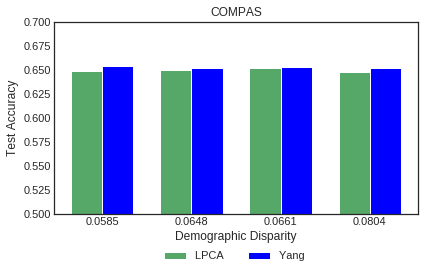

In [34]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-white')

labels = ['0.0585','0.0648', '0.0661','0.0804']
LP = [.6489,0.6496,0.6521,0.6483]
YA = [ 0.6540,0.6521, 0.6534, 0.6521]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, LP, width, color = 'g',label='LPCA ')
rects2 = ax.bar(x + width/2, YA, width, color = 'blue',label='Yang ')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Test Accuracy')
ax.set_xlabel('Demographic Disparity')
ax.set_title('COMPAS')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.legend()
ax.set_ylim(.5,.7 )
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
fig.tight_layout()

plt.show()
# plt.savefig('a5.png')

In [13]:
#Overlapping
accu_all,DP_all,acceptance_rate,alpha_weight = main(sensitive, Y_test, Y_test_pred,e )

sensitive attribute  1
ACTUAL----------total ,accepted, aceeptance rate:
624
238
0.3814102564102564
sensitive attribute  2
ACTUAL----------total ,accepted, aceeptance rate:
960
484
0.5041666666666667
sensitive attribute  3
ACTUAL----------total ,accepted, aceeptance rate:
1260
599
0.4753968253968254
sensitive attribute  4
ACTUAL----------total ,accepted, aceeptance rate:
324
123
0.37962962962962965
data acceptance rates
[0.3814102564102564, 0.5041666666666667, 0.4753968253968254, 0.37962962962962965]
data DP
0.124537037037037
sensitive attribute  1
prec reca accuracy for each sens
0.6335403726708074 0.42857142857142855 0.6875
SVM----------total , accepted, aceeptance rate:
624
161
0.25801282051282054
sensitive attribute  2
prec reca accuracy for each sens
0.6666666666666666 0.7148760330578512 0.6760416666666667
SVM----------total , accepted, aceeptance rate:
960
519
0.540625
sensitive attribute  3
prec reca accuracy for each sens
0.6556291390728477 0.66110183639399 0.6738095238095239
S

Optimal
objective is:
4632261.0
discripency is:
None
gamma-epsilon-delta [0.25961538461538464, 0.51875, 0.430952380952381, 0.3611111111111111] 0.01
<--------------------------------------->
iteration t 9
sensitive attribute  1
sensitive attribute  2
sensitive attribute  3
sensitive attribute  4
individual acceptance rates
[0.25961538461538464, 0.51875, 0.430952380952381, 0.3611111111111111]
individul precision
[0.6172839506172839, 0.6606425702811245, 0.6666666666666666, 0.5726495726495726]
individual recall
[0.42016806722689076, 0.6797520661157025, 0.6043405676126878, 0.5447154471544715]
DP all
0.2591346153846154
precision all 0.65
recall all 0.5941828254847645
accuracy all 0.6691919191919192
TP,FP,TN,FN
429 231 631 293
dimension of data
4 1584
Optimal
objective is:
215907.0
discripency is:
None
gamma-epsilon-delta [0.25961538461538464, 0.51875, 0.430952380952381, 0.3611111111111111] 0.01
<--------------------------------------->
iteration t 10
sensitive attribute  1
sensitive attribut

Optimal
objective is:
4109874.0
discripency is:
None
gamma-epsilon-delta [0.34615384615384615, 0.43125, 0.403968253968254, 0.3734567901234568] 0.01
<--------------------------------------->
iteration t 9
sensitive attribute  1
sensitive attribute  2
sensitive attribute  3
sensitive attribute  4
individual acceptance rates
[0.34615384615384615, 0.43125, 0.403968253968254, 0.3734567901234568]
individul precision
[0.5416666666666666, 0.6859903381642513, 0.6699410609037328, 0.49586776859504134]
individual recall
[0.49159663865546216, 0.5867768595041323, 0.5692821368948247, 0.4878048780487805]
DP all
0.08509615384615388
precision all 0.6365079365079365
recall all 0.5554016620498615
accuracy all 0.6527777777777778
TP,FP,TN,FN
401 229 633 321
dimension of data
4 1584
Optimal
objective is:
184447.0
discripency is:
None
gamma-epsilon-delta [0.34615384615384615, 0.43125, 0.403968253968254, 0.3734567901234568] 0.01
<--------------------------------------->
iteration t 10
sensitive attribute  1
se

Optimal
objective is:
1438473.0
discripency is:
None
gamma-epsilon-delta [0.27884615384615385, 0.20416666666666666, 0.23015873015873015, 0.24691358024691357] 0.01
<--------------------------------------->
iteration t 9
sensitive attribute  1
sensitive attribute  2
sensitive attribute  3
sensitive attribute  4
individual acceptance rates
[0.27884615384615385, 0.20833333333333334, 0.23015873015873015, 0.25925925925925924]
individul precision
[0.5574712643678161, 0.75, 0.7206896551724138, 0.4523809523809524]
individual recall
[0.40756302521008403, 0.30991735537190085, 0.34891485809682804, 0.3089430894308943]
DP all
0.07051282051282051
precision all 0.660427807486631
recall all 0.34210526315789475
accuracy all 0.6199494949494949
TP,FP,TN,FN
247 127 735 475
dimension of data
4 1584
Optimal
objective is:
62424.0
discripency is:
None
gamma-epsilon-delta [0.27884615384615385, 0.20416666666666666, 0.23015873015873015, 0.24691358024691357] 0.01
<--------------------------------------->
iteration

Optimal
objective is:
2129171.0
discripency is:
None
gamma-epsilon-delta [0.2948717948717949, 0.2708333333333333, 0.2857142857142857, 0.25925925925925924] 0.01
<--------------------------------------->
iteration t 9
sensitive attribute  1
sensitive attribute  2
sensitive attribute  3
sensitive attribute  4
individual acceptance rates
[0.2948717948717949, 0.275, 0.2857142857142857, 0.2716049382716049]
individul precision
[0.5489130434782609, 0.7121212121212122, 0.6944444444444444, 0.4431818181818182]
individual recall
[0.42436974789915966, 0.3884297520661157, 0.41736227045075125, 0.3170731707317073]
DP all
0.023266856600189956
precision all 0.6450892857142857
recall all 0.4002770083102493
accuracy all 0.6262626262626263
TP,FP,TN,FN
289 159 703 433
dimension of data
4 1584
Optimal
objective is:
88341.0
discripency is:
None
gamma-epsilon-delta [0.2948717948717949, 0.2708333333333333, 0.2857142857142857, 0.25925925925925924] 0.01
<--------------------------------------->
iteration t 10
sen